<a href="https://colab.research.google.com/github/Nawshin-25/Saint_Martin/blob/main/NDVI_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
ndvi_files = {
    '1990': '/content/drive/MyDrive/Data/NDVI/ST_NDVI90.tif',
    '1995': '/content/drive/MyDrive/Data/NDVI/ST_NDVI95.tif',
    '2000': '/content/drive/MyDrive/Data/NDVI/ST_NDVI00.tif',
    '2005': '/content/drive/MyDrive/Data/NDVI/ST_NDVI05.tif',
    '2010': '/content/drive/MyDrive/Data/NDVI/ST_NDVI10.tif',
    '2015': '/content/drive/MyDrive/Data/NDVI/ST_NDVI15.tif',
    '2020': '/content/drive/MyDrive/Data/NDVI/ST_NDVI20.tif',
    '2024': '/content/drive/MyDrive/Data/NDVI/ST_NDVI24.tif'
}

In [5]:
def calculate_mean_ndvi(file_path):
    with rasterio.open(file_path) as src:
        ndvi_data = src.read(1)  # Read the first band
        ndvi_data = ndvi_data.astype(float)
        ndvi_data[ndvi_data == src.nodata] = np.nan  # Replace nodata values with NaN
        mean_ndvi = np.nanmean(ndvi_data)  # Calculate mean NDVI ignoring NaNs
        return mean_ndvi

In [6]:
ndvi_means = {}
for year, file_path in ndvi_files.items():
    ndvi_means[year] = calculate_mean_ndvi(file_path)

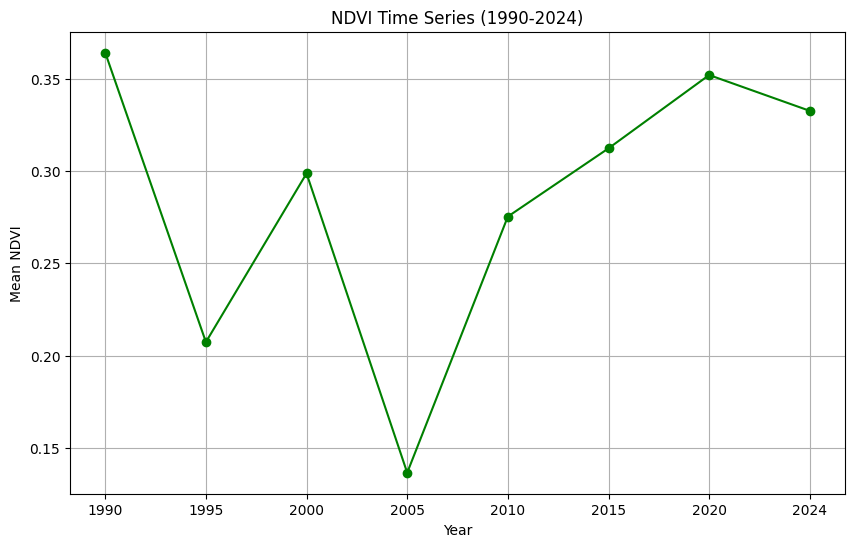

In [7]:
years = list(ndvi_means.keys())
mean_values = list(ndvi_means.values())

plt.figure(figsize=(10, 6))
plt.plot(years, mean_values, marker='o', linestyle='-', color='green')
plt.title('NDVI Time Series (1990-2024)')
plt.xlabel('Year')
plt.ylabel('Mean NDVI')
plt.grid(True)
plt.show()